<a href="https://colab.research.google.com/github/maxMitsuya/data_cleaning_wrangling/blob/main/Data_Cleaning_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 05 - Preparando dataset para modelagem de dados

## Contexto

Uma empresa do ramo de e-commerce contratou você para levantar os indicadores de recência, frequência e ticket médio (RFM) dos seus clientes.

A saber RFM:

- R (Recency): Tempo que o cliente realizou a última compra (em dias)
- F (Frequency): Quantidade de compras realizadas pelo cliente
- M (Monetary): Valor do ticket médio gasto pelo cliente

onde ticket médio = média do total gasto por pedido para cada cliente.

Para isso, vocês receberam uma base de dados (arquivo csv) e devem construir um código em Python que gera um output também csv, porém contendo apenas a identificação do cliente e métricas RFM.

## Sobre os dados

A tabela contém informações de compras de um e-commerce em 37 países. Contém a identificação do cliente e os dados da compra.

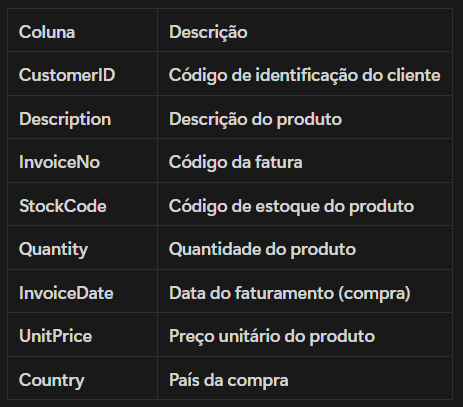

## Etapas de Desenvolvimento

### Etapa 01 - Carregando o arquivo e realizando primeiras análises

In [ ]:
#Instalando bibliotecas
!pip install sidetable
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=cce182084cbacde34a48fb0da654924e1312fd7a341e2ff042dd916b2d11e46c
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
#Importando bibliotecas
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
from ydata_profiling import ProfileReport
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

In [ ]:
#Configurando gráficos
sns.set_theme(
    context='talk',
    style='ticks',
    font_scale=.8,
    rc={
        'figure.figsize': (12,8)
    }
)

In [ ]:
#Carregando dataset
df = pd.read_csv('data.csv', encoding = 'latin1')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#Analisando a distribuição dos dados
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Total_Compra
count,392732.000000,392732,392732.000000,392732.000000,392732.000000
mean,5.710085,2011-07-10 19:15:24.576301568,2.332434,15287.734822,10.860780
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000,0.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.200000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,8.500000
75%,10.000000,2011-10-20 12:53:00,3.750000,16791.000000,15.300000
max,10.000000,2011-12-09 12:50:00,5.000000,18287.000000,50.000000
std,3.713702,NaN,1.565830,1713.567773,9.184777


Colunas Quantity e UnitPrice apresentam valores negativos, desvio padrão superior a média e possivelmente outliers.

In [ ]:
#Analisando os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392732 non-null  object        
 1   StockCode     392732 non-null  object        
 2   Description   392732 non-null  object        
 3   Quantity      392732 non-null  int64         
 4   InvoiceDate   392732 non-null  datetime64[ns]
 5   UnitPrice     392732 non-null  float64       
 6   CustomerID    392732 non-null  int64         
 7   Country       392732 non-null  object        
 8   Total_Compra  392732 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 30.0+ MB


Colunas: Description, CustomerID e Country possuem valores nulos

In [ ]:
tipos_dados_esperados = ['object', 'object', 'object', 'int64', 'datetime', 'float64', 'int64', 'object']
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,int64
Country,object
Total_Compra,float64


In [ ]:
#Comparando os tipos de dados do df com os tipos esperados
def comparar_tipos(df, tipos_esperados):
  tipos_esperados_df = pd.DataFrame({'coluna': df.columns, 'tipo_esperado': tipos_dados_esperados})
  tipos_atuais_df = pd.DataFrame({'coluna': df.columns, 'tipo_atual': df.dtypes.values})

  comparacao_tipos = pd.merge(tipos_esperados_df, tipos_atuais_df, on='coluna')
  return comparacao_tipos


Após análise dos tipos de dados, vemos que será necessário a alteração do tipo de dado da coluna InvoiceDate para datetime e da coluna CustomerID para int.

### Etapa 02 - Valores faltante em CustomerID

In [ ]:
#Verificando quantidade de valores faltantes em cada coluna usando biblioteca sidetable
df.stb.missing()

,missing,total,percent
CustomerID,135080,541909,24.926694
Description,1454,541909,0.268311
InvoiceNo,0,541909,0.000000
StockCode,0,541909,0.000000
Quantity,0,541909,0.000000
InvoiceDate,0,541909,0.000000
UnitPrice,0,541909,0.000000
Country,0,541909,0.000000


<Axes: >

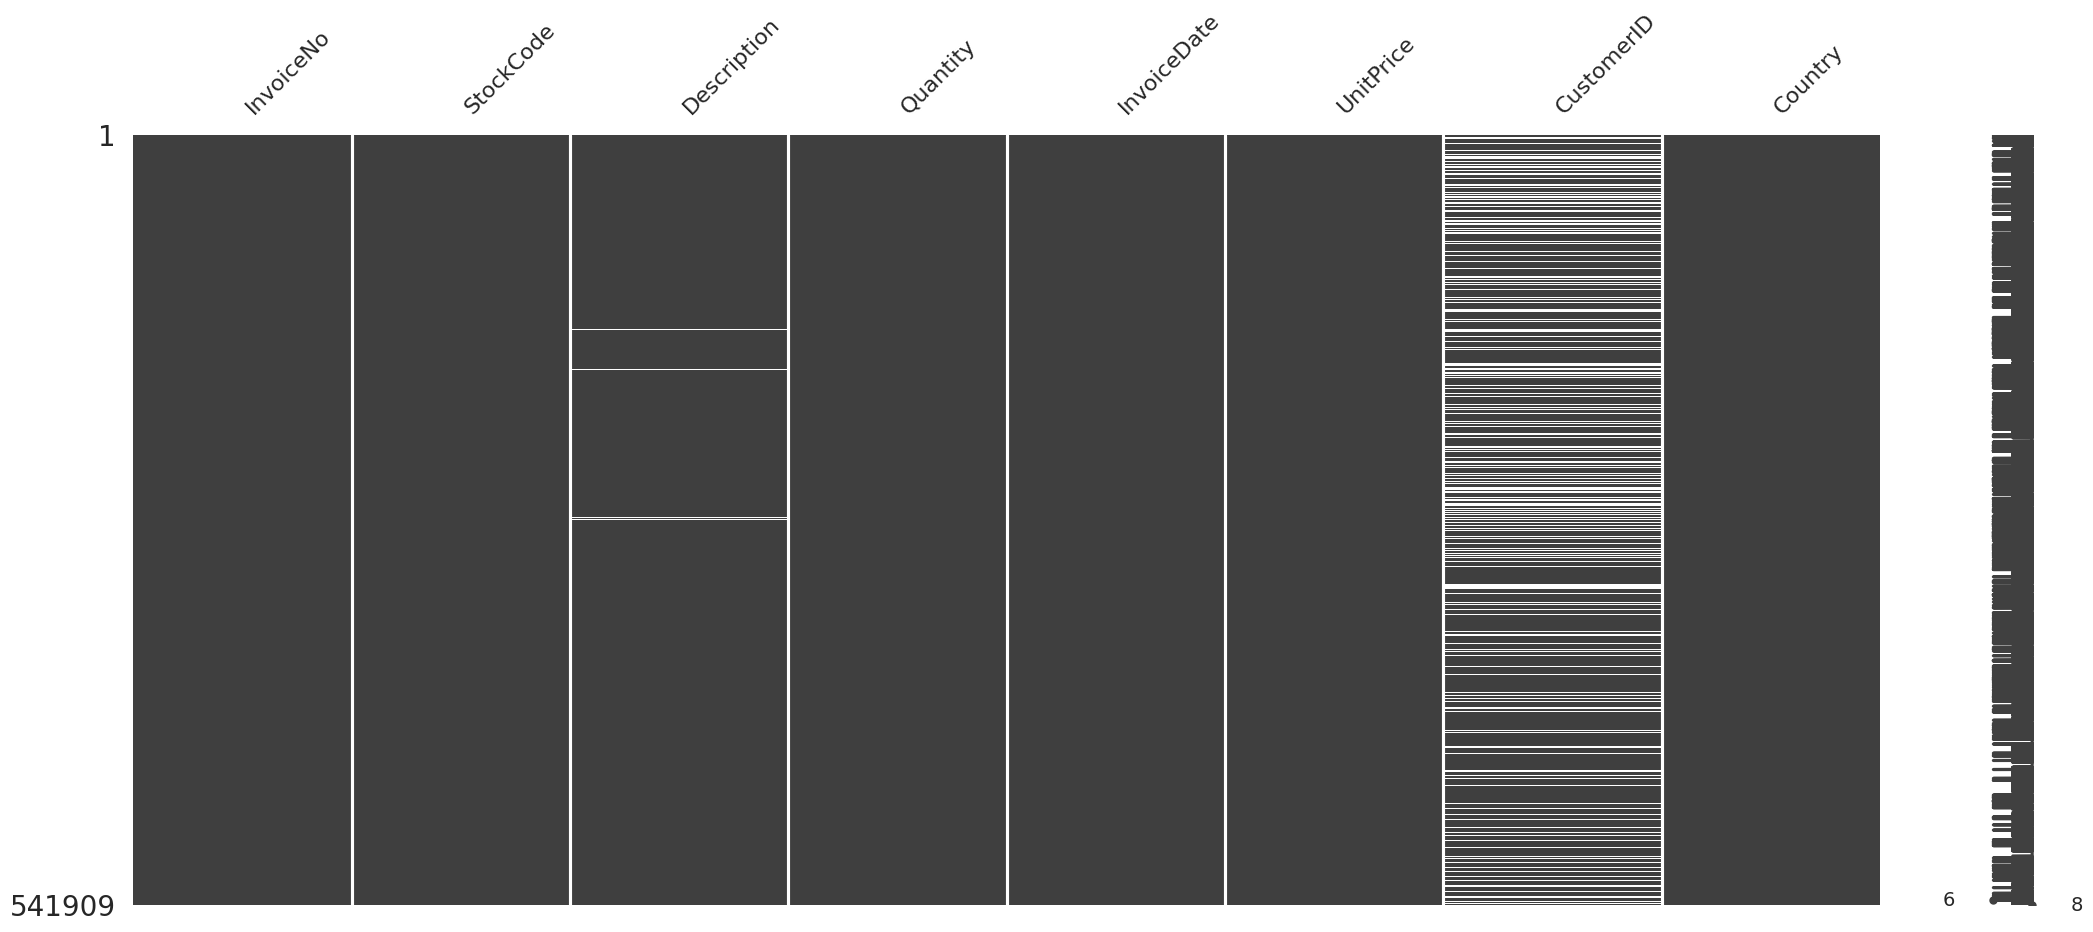

In [ ]:
#Análise Gráfica
msno.matrix(df)

In [ ]:
#Verificando os valores nulos usando isna e sum
df.isna().sum().sort_values(ascending=False)

,0
CustomerID,135080
Description,1454
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [ ]:
#Removendo valores nulos
df.dropna(subset=['CustomerID'], inplace=True)

In [ ]:
df.isna().sum().sort_values(ascending=False)

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Etapa 03 - Preços unitários e quantidade de produtos iguais ou inferior a 0

In [ ]:
filtro_preco = df[(df['UnitPrice'].isnull()) | (df['UnitPrice'] < 0)]


In [ ]:
filtro_preco

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#Retirando do df o filtro_preco
df = df[~df.index.isin(filtro_preco.index)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
filtro_quantidade = df[(df['Quantity'].isnull()) | (df['Quantity'] < 0)]
filtro_quantidade

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
df = df[~df.index.isin(filtro_quantidade.index)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


### Etapa 04 - Verificando duplicatas

In [ ]:
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
df.drop_duplicates(inplace=True)
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Etapa 05 - Alterando tipos de dados

In [ ]:
# 'CustomerID' para o tipo int64
df['CustomerID'] = df['CustomerID'].astype('int64')

# 'InvoiceDate' para o tipo datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
comparar_tipos(df, tipos_dados_esperados)

,coluna,tipo_esperado,tipo_atual
0,InvoiceNo,object,object
1,StockCode,object,object
2,Description,object,object
3,Quantity,int64,int64
4,InvoiceDate,datetime,datetime64[ns]
5,UnitPrice,float64,float64
6,CustomerID,int64,int64
7,Country,object,object


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


### Etapa 06 - Tratando Outiliers

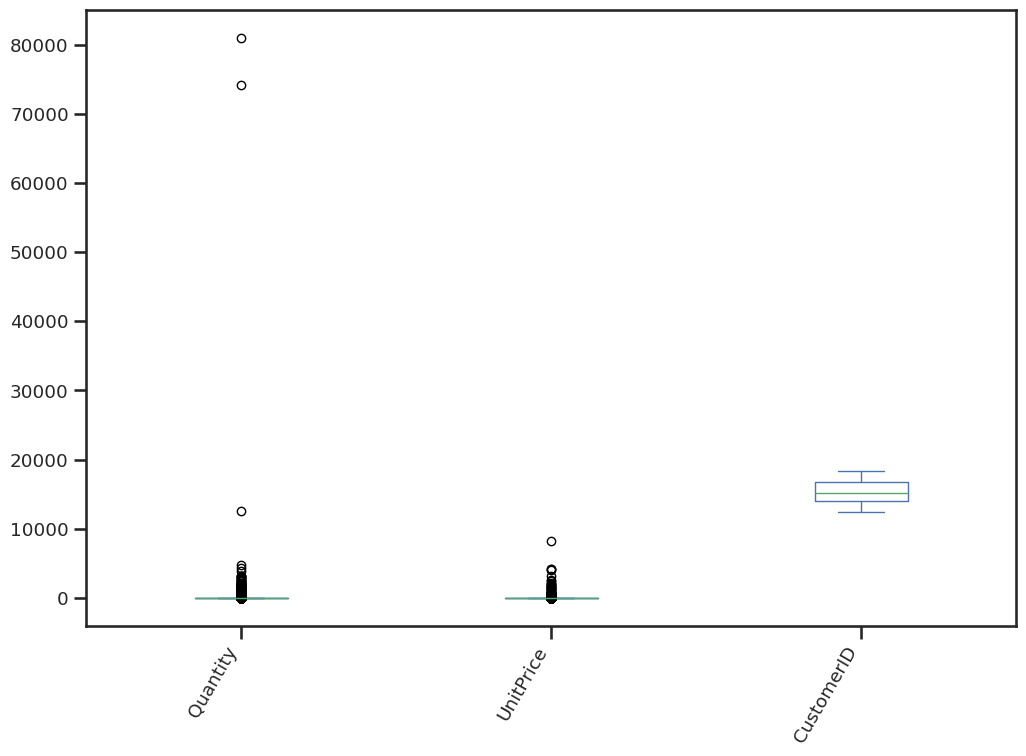

In [ ]:
#Análise Gráfica
df.plot.box()
plt.xticks(rotation=60, ha='right');

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392732.000000,392732,392732.000000,392732.000000
mean,13.153718,2011-07-10 19:15:24.576301568,3.125596,15287.734822
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,181.588420,NaN,22.240725,1713.567773


In [ ]:
#Definindo limite superior para quantidade de compras até 10
limite_superior_quantidade = 10
df.loc[df['Quantity'] > limite_superior_quantidade, 'Quantity'] = limite_superior_quantidade

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392732.000000,392732,392732.000000,392732.000000
mean,5.710085,2011-07-10 19:15:24.576301568,3.125596,15287.734822
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,10.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,10.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,3.713702,NaN,22.240725,1713.567773


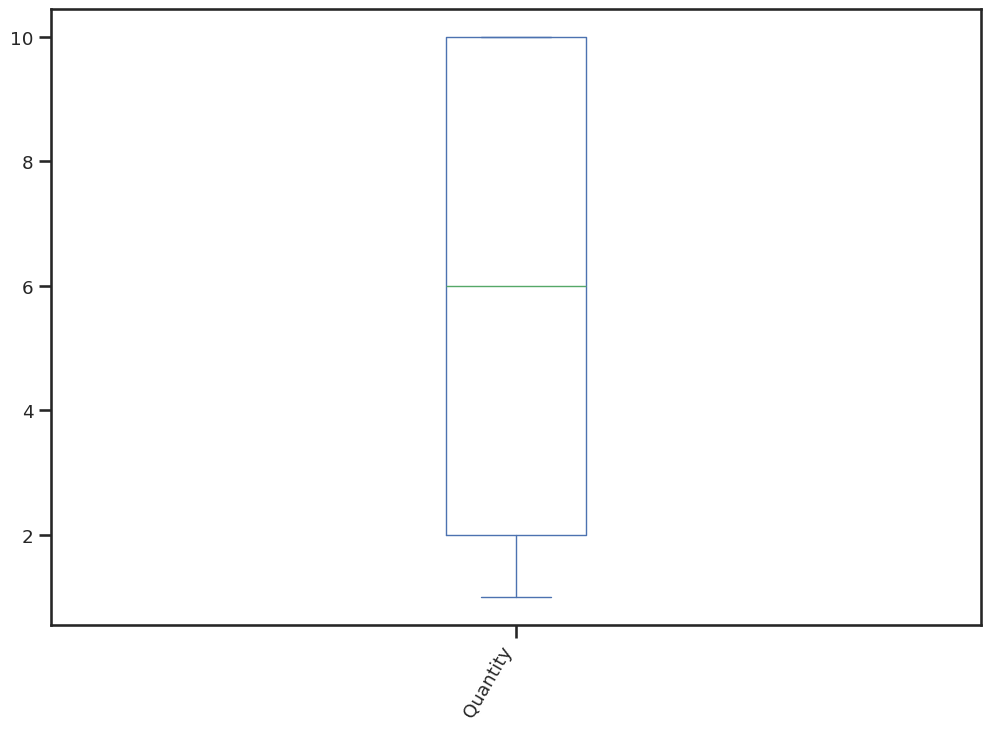

In [ ]:
#Análise Gráfica
df['Quantity'].plot.box()
plt.xticks(rotation=60, ha='right');

In [ ]:
#Definindo limite superior para preço unitário de R$ 5
limite_superior_preco = 5
df.loc[df['UnitPrice'] > limite_superior_preco, 'UnitPrice'] = limite_superior_preco

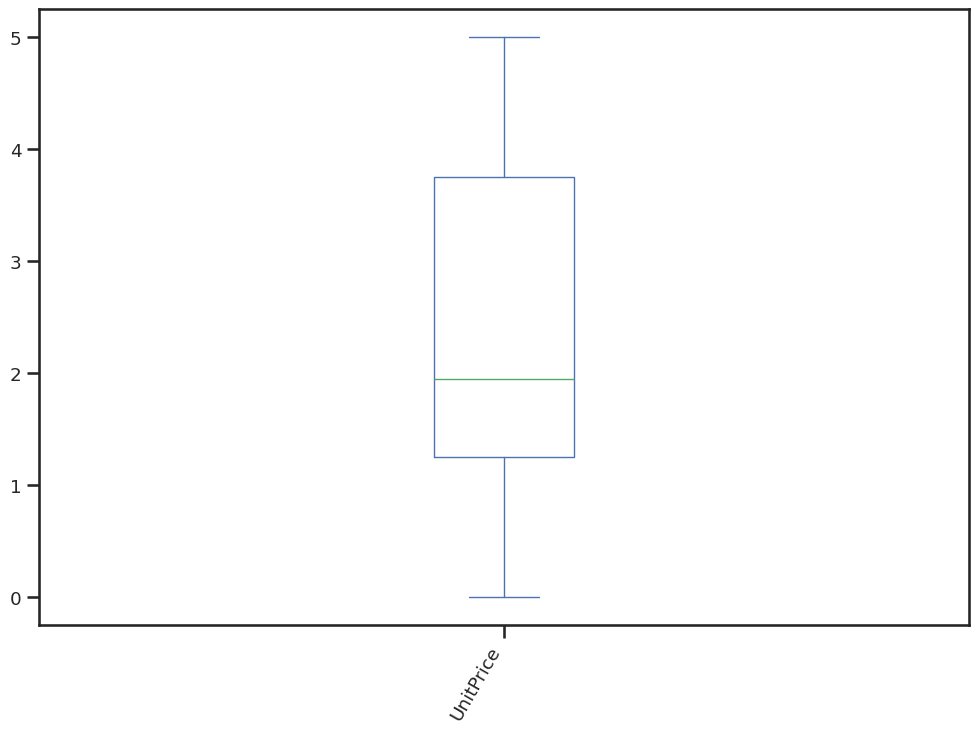

In [ ]:
#Análise Gráfica
df['UnitPrice'].plot.box()
plt.xticks(rotation=60, ha='right');

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392732.000000,392732,392732.000000,392732.000000
mean,5.710085,2011-07-10 19:15:24.576301568,2.332434,15287.734822
min,1.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,10.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,10.000000,2011-12-09 12:50:00,5.000000,18287.000000
std,3.713702,NaN,1.565830,1713.567773


### Etapa 07 - Adicionando coluna de total de compra

In [ ]:
df['Total_Compra'] = df['Quantity'] * df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Compra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


###Etapa 08 - Calcular última data

In [ ]:
ultima_data = df['InvoiceDate'].max()
ultima_data

Timestamp('2011-12-09 12:50:00')

###Etapa 09 - Plotando gráficos

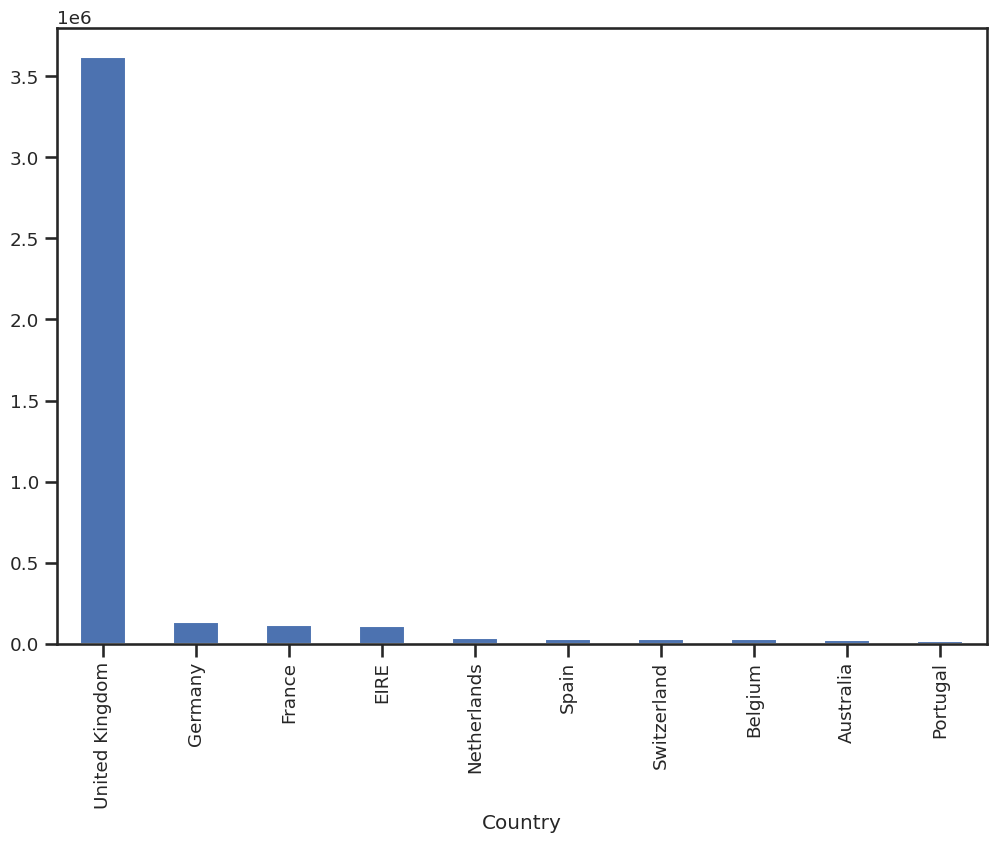

In [ ]:
#Top 10 países com maior valor em vendas
df.groupby('Country')['Total_Compra'].sum().sort_values(ascending=False).head(10).plot(kind='bar');

<Axes: xlabel='Description'>

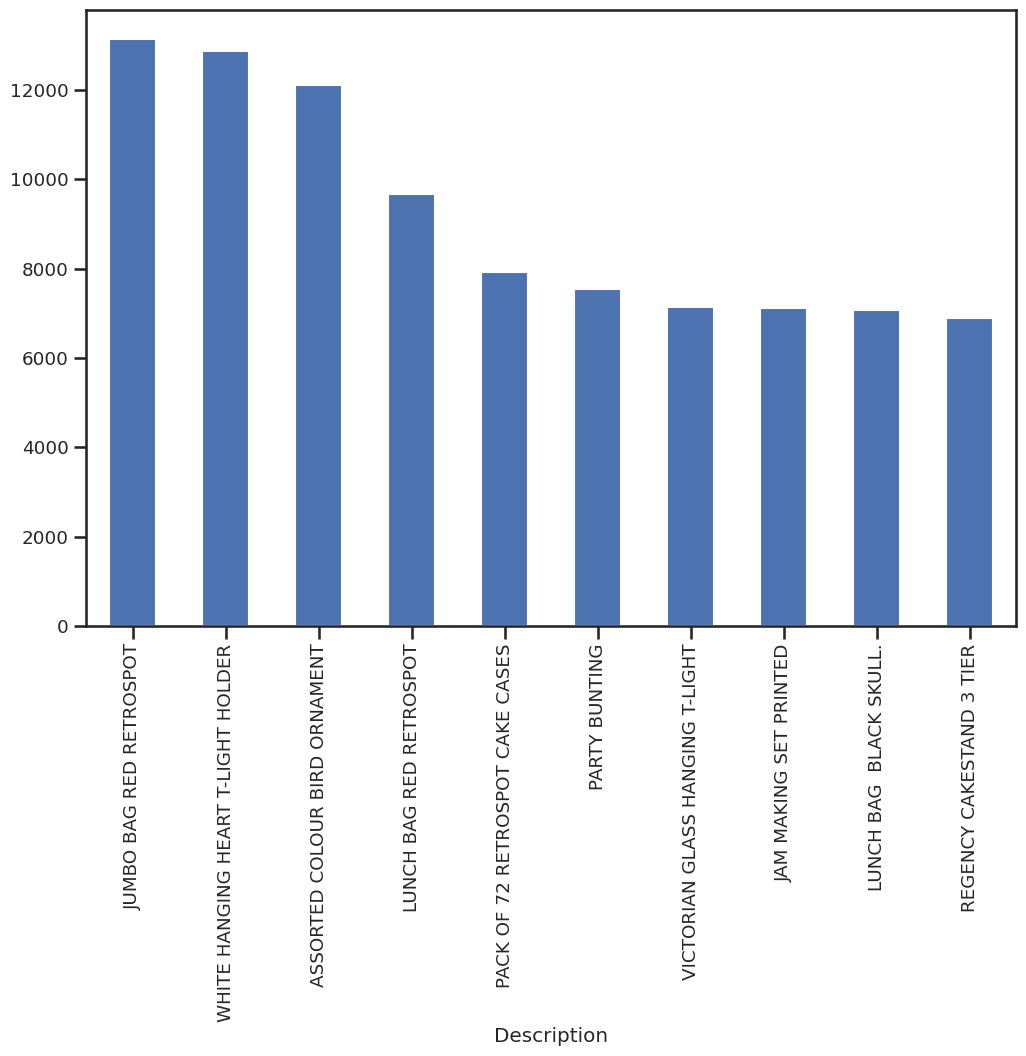

In [ ]:
#Top 10 produtos mais vendidos
df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

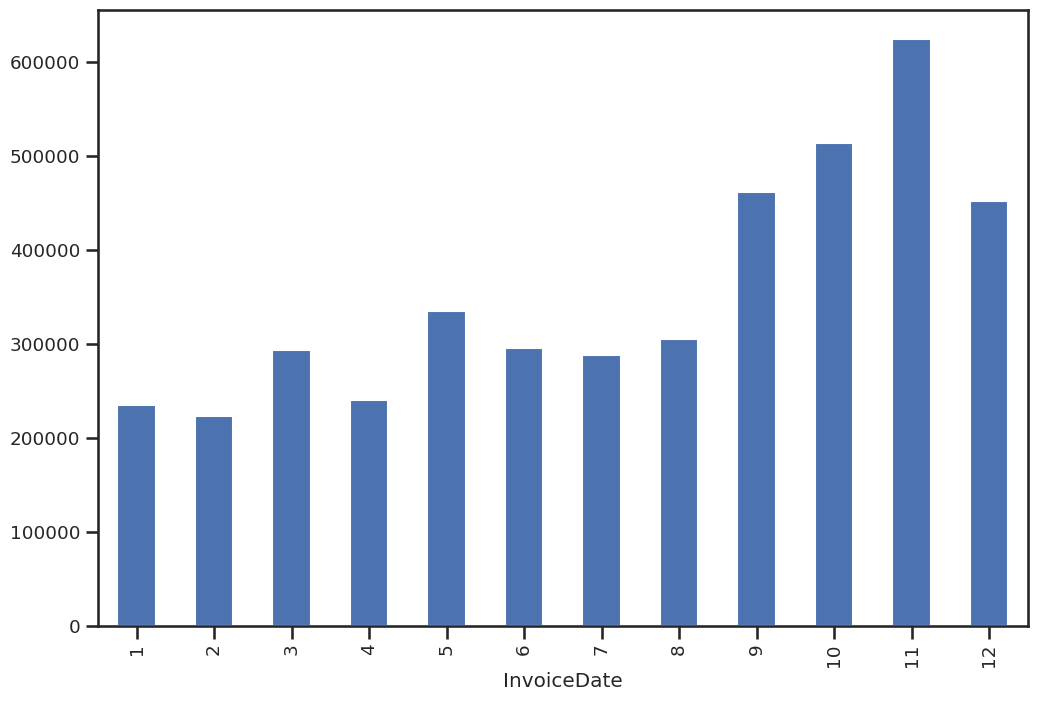

In [ ]:
#Valor total de vendas por mês
df.groupby(df['InvoiceDate'].dt.month)['Total_Compra'].sum().plot(kind='bar');

<Axes: xlabel='InvoiceDate'>

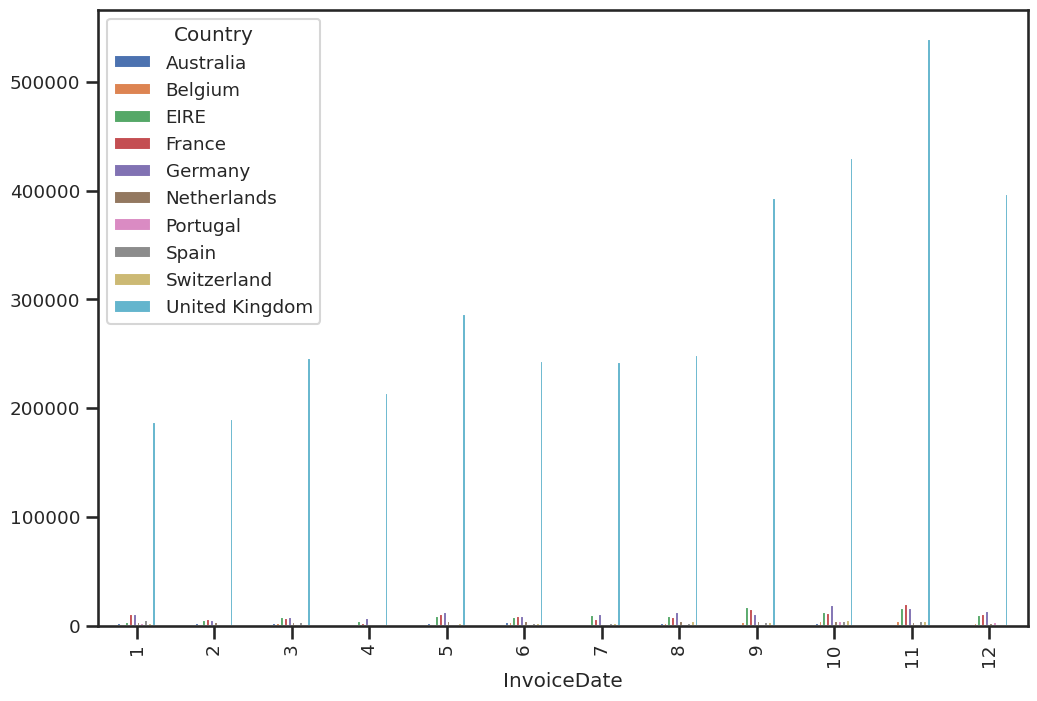

In [ ]:
#Valor de venda total por mês e por país (considere apenas os top 10)
top_10_paises = df.groupby('Country')['Total_Compra'].sum().sort_values(ascending=False).head(10).index
df[df['Country'].isin(top_10_paises)].groupby([df['InvoiceDate'].dt.month, 'Country'])['Total_Compra'].sum().unstack().plot(kind='bar')

###Etapa 10 - Calcular RFM

In [ ]:
rfm_data = df.groupby(['CustomerID', 'InvoiceNo'])[['Total_Compra', 'InvoiceDate']].agg({'Total_Compra':'sum', 'InvoiceDate':'max'})
rfm_data


Total_Compra         InvoiceDate
CustomerID InvoiceNo                                  
12346      541431            10.40 2011-01-18 10:01:00
12347      537626           572.95 2010-12-07 14:57:00
           542237           381.20 2011-01-26 14:30:00
           549222           327.70 2011-04-07 10:43:00
           556201           311.06 2011-06-09 13:01:00
...                            ...                 ...
18283      579673           218.61 2011-11-30 12:59:00
           580872           208.00 2011-12-06 12:02:00
18287      554065           429.10 2011-05-22 10:39:00
           570715           400.60 2011-10-12 10:23:00
           573167            19.30 2011-10-28 09:29:00

[18536 rows x 2 columns]

In [ ]:
# Recalcular o RFM agrupando apenas por cliente
rfm = rfm_data.groupby('CustomerID').agg(
    Recencia=('InvoiceDate', lambda x: (ultima_data - x.max()).days),
    Frequencia=('InvoiceDate', 'count'),
    Ticket_medio=('Total_Compra', 'mean')
)

rfm


,Recencia,Frequencia,Ticket_medio
CustomerID,,,
12346,325,1,10.400000
12347,1,7,425.952857
12348,74,4,58.025000
12349,18,1,1085.340000
12350,309,1,246.200000
...,...,...,...
18280,277,1,159.150000
18281,180,1,54.400000
18282,7,2,65.845000
